In [1]:
%cd ../

/home/dmoreno/pipeline_v4_final/pipeline/training/stamp_classifier/models/experimentation/stamp_rubin


In [18]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
mlflow.set_tracking_uri("file:./results_ztf_to_rubin/ml-runs")

experiment_name = f"classification/ztf_to_rubin/testing"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])
runs = runs[
    (runs.status == 'FINISHED')
    ]

# Identificadores de cada fold
#fold_run = {v: k for k, v in zip(runs['run_id'], runs['params.general/fold'])}

display(runs.head())
print(runs.shape)
#print(fold_run)

Experiment ID for 'classification/ztf_to_rubin/testing': 196451389654529993


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_accuracy_epoch_avg,metrics.val_accuracy,metrics.train_loss_running,metrics.test_recall,...,metrics.test_f1,metrics.val_f1,metrics.train_accuracy,metrics.train_loss,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName
0,e35b316364ad4ace919b9bf4a5c02fc6,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:51:55.528000+00:00,2025-09-30 22:56:23.397000+00:00,0.945312,0.850488,0.161167,0.706314,...,0.692281,0.745482,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_4_2025-09-30_22-30-38
1,2eacbcfbb18c45a6a720c29cc2850a9c,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:46:59.620000+00:00,2025-09-30 22:51:55.524000+00:00,0.953125,0.858072,0.123936,0.686120,...,0.700097,0.693483,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_3_2025-09-30_22-30-38
2,8ac0b87b615c4427b70782adae092a79,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:42:08.090000+00:00,2025-09-30 22:46:59.617000+00:00,0.960938,0.864572,0.125367,0.692449,...,0.695314,0.659270,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_2_2025-09-30_22-30-38
3,65590292aa4f4a3bb6d4637495470ec2,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:35:38.186000+00:00,2025-09-30 22:42:08.087000+00:00,0.933594,0.851732,0.191934,0.688208,...,0.681062,0.658136,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_1_2025-09-30_22-30-38
4,9bf62279e5c9475fafebaa9d0d7a8b96,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:30:38.509000+00:00,2025-09-30 22:35:38.184000+00:00,0.957031,0.863636,0.111471,0.686616,...,0.694995,0.707258,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_0_2025-09-30_22-30-38


(15, 24)


In [20]:
runs.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.train_accuracy_epoch_avg', 'metrics.val_accuracy',
       'metrics.train_loss_running', 'metrics.test_recall', 'metrics.val_loss',
       'metrics.train_loss_epoch_avg', 'metrics.train_accuracy_running',
       'metrics.test_precision', 'metrics.test_f1', 'metrics.val_f1',
       'metrics.train_accuracy', 'metrics.train_loss',
       'tags.mlflow.parentRunId', 'tags.mlflow.source.git.commit',
       'tags.mlflow.user', 'tags.mlflow.source.type',
       'tags.mlflow.source.name', 'tags.mlflow.runName'],
      dtype='object')

In [21]:
runs['run_name'] = runs['tags.mlflow.runName'].apply(lambda row: '_'.join(row.split('_')[-2:]))
runs['run_name']

0     2025-09-30_22-30-38
1     2025-09-30_22-30-38
2     2025-09-30_22-30-38
3     2025-09-30_22-30-38
4     2025-09-30_22-30-38
5     2025-09-30_22-30-38
7     2025-09-30_22-19-01
9     2025-09-25_15-32-37
10    2025-09-25_15-32-37
11    2025-09-25_14-47-56
12    2025-09-25_14-47-56
13    2025-09-25_14-37-09
14    2025-09-25_14-37-09
15    2025-09-25_14-34-58
16    2025-09-25_14-34-58
Name: run_name, dtype: object

In [22]:
# --- El nuevo código para agrupar y promediar ---

# 1. Define las métricas que te interesan promediar.
#    Asegúrate de que los nombres coincidan exactamente con las columnas del DataFrame.
metric_cols = [
    'metrics.val_f1',
    'metrics.train_f1',
    'metrics.train_loss',
    # Agrega aquí cualquier otra métrica que quieras promediar
    'metrics.val_loss',
    'metrics.val_accuracy',
    'metrics.test_f1',
    'metrics.test_precision',
    'metrics.test_recall',
]
# Filtra para solo usar las métricas que existen en tu dataframe
metric_cols_exist = [col for col in metric_cols if col in runs.columns]


# 2. Define los hiperparámetros que identifican cada experimento.
#    Queremos mantenerlos para saber qué combinación de hiperparámetros dio qué resultado.
param_cols = [col for col in runs.columns if col.startswith('params.')]


# 3. Agrupa por el ID del "Run padre" y realiza las agregaciones.
#    - Para las métricas: calcula la media ('mean') y la desviación estándar ('std').
#    - Para los parámetros: toma el primer valor ('first'), ya que son iguales para todo el grupo.
agg_dict = {**{col: ['mean', 'std'] for col in metric_cols_exist}, 
            **{col: 'first' for col in param_cols}}

# Elimina las columnas que no existen en el dataframe para evitar errores
agg_dict = {k: v for k, v in agg_dict.items() if k in runs.columns}

# Realiza la agrupación
# Nota: filtramos los runs que no tienen un parentRunId, que suelen ser los propios "runs padres"
#results_by_hp = runs.dropna(subset=['tags.mlflow.parentRunId']).groupby('tags.mlflow.parentRunId').agg(agg_dict)
results_by_hp = runs.dropna(subset=['run_name']).groupby('run_name').agg(agg_dict)


# 4. (Opcional pero recomendado) Limpia los nombres de las columnas para que sean más manejables.
results_by_hp.columns = ['_'.join(col).strip() for col in results_by_hp.columns.values]
# Renombramos las columnas de los parámetros para quitar el '_first'
results_by_hp = results_by_hp.rename(columns=lambda col: col.replace('_first', '') if '_first' in col else col)


# 5. Ordena los resultados para ver los mejores hiperparámetros primero.
#    Por ejemplo, ordenar por la media del F1-score de validación de forma descendente.
best_results = results_by_hp.sort_values('metrics.test_f1_mean', ascending=False)

# Muestra los resultados
print("Resultados promediados por set de hiperparámetros:")
# También puedes ver solo las columnas más importantes
display(best_results[[
    'metrics.test_f1_mean', 
    'metrics.test_f1_std',
    'metrics.val_f1_mean', 
    'metrics.val_f1_std',
    # Agrega más columnas de parámetros y métricas que quieras ver
]].head(10))

Resultados promediados por set de hiperparámetros:


,metrics.test_f1_mean,metrics.test_f1_std,metrics.val_f1_mean,metrics.val_f1_std
run_name,,,,
2025-09-25_14-34-58,0.720503,NaN,0.631682,NaN
2025-09-25_14-37-09,0.709982,NaN,0.669526,NaN
2025-09-30_22-19-01,0.700754,NaN,0.708675,NaN
2025-09-25_14-47-56,0.696851,NaN,0.669799,NaN
2025-09-30_22-30-38,0.692750,0.007114,0.692726,0.036437
2025-09-25_15-32-37,0.492780,NaN,0.521914,NaN


In [23]:
run_name = '2025-09-30_22-30-38'

In [24]:
fold_run = runs[runs['run_name'] == run_name]
fold_run

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_accuracy_epoch_avg,metrics.val_accuracy,metrics.train_loss_running,metrics.test_recall,...,metrics.val_f1,metrics.train_accuracy,metrics.train_loss,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,run_name
0,e35b316364ad4ace919b9bf4a5c02fc6,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:51:55.528000+00:00,2025-09-30 22:56:23.397000+00:00,0.945312,0.850488,0.161167,0.706314,...,0.745482,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_4_2025-09-30_22-30-38,2025-09-30_22-30-38
1,2eacbcfbb18c45a6a720c29cc2850a9c,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:46:59.620000+00:00,2025-09-30 22:51:55.524000+00:00,0.953125,0.858072,0.123936,0.686120,...,0.693483,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_3_2025-09-30_22-30-38,2025-09-30_22-30-38
2,8ac0b87b615c4427b70782adae092a79,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:42:08.090000+00:00,2025-09-30 22:46:59.617000+00:00,0.960938,0.864572,0.125367,0.692449,...,0.659270,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_2_2025-09-30_22-30-38,2025-09-30_22-30-38
3,65590292aa4f4a3bb6d4637495470ec2,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:35:38.186000+00:00,2025-09-30 22:42:08.087000+00:00,0.933594,0.851732,0.191934,0.688208,...,0.658136,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_1_2025-09-30_22-30-38,2025-09-30_22-30-38
4,9bf62279e5c9475fafebaa9d0d7a8b96,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:30:38.509000+00:00,2025-09-30 22:35:38.184000+00:00,0.957031,0.863636,0.111471,0.686616,...,0.707258,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_0_2025-09-30_22-30-38,2025-09-30_22-30-38
5,49b1d64b22084f4abfeafe6fb31d9146,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:30:38.501000+00:00,2025-09-30 22:56:23.399000+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,2025-09-30_22-30-38,2025-09-30_22-30-38


In [25]:
for idx, row in fold_run.iterrows():
    try:
        experiment_id = row['experiment_id']
        run_id = row['run_id']
        path_pred = f'./results_ztf_to_rubin/ml-runs/{experiment_id}/{run_id}/artifacts/test_predictions.csv'
        predictions = pd.read_csv(path_pred)
        print(predictions)
        break
    except:
        print('pasando')

                     oid  true_label_int  predicted_label_int true_label  \
0     628760465987600423               2                    2         VS   
1     611255003922825940               2                    2         VS   
2     650018836115882038               2                    0         VS   
3     592915218690998602               2                    2         VS   
4     648367644528869531               2                    2         VS   
...                  ...             ...                  ...        ...   
1150  604064060438217980               4                    4      bogus   
1151  604063510682403797               4                    4      bogus   
1152  592914737654661881               4                    4      bogus   
1153  579576630817597152               4                    4      bogus   
1154  612929216534544390               4                    4      bogus   

     predicted_label  predicted_probability  prob_AGN       prob_SN   prob_VS  \
0     

In [26]:
predictions

,oid,true_label_int,predicted_label_int,true_label,predicted_label,predicted_probability,prob_AGN,prob_SN,prob_VS,prob_asteroid,prob_bogus,prob_satellite
0,628760465987600423,2,2,VS,VS,0.944355,0.000330,7.949867e-09,0.944355,0.000042,0.055273,1.453511e-10
1,611255003922825940,2,2,VS,VS,0.933048,0.000318,1.589501e-08,0.933048,0.000102,0.066531,7.808406e-10
2,650018836115882038,2,0,VS,AGN,0.740436,0.740436,2.337341e-02,0.167579,0.017103,0.051059,4.485146e-04
3,592915218690998602,2,2,VS,VS,0.891794,0.000152,2.224497e-08,0.891794,0.000097,0.107958,1.043599e-08
4,648367644528869531,2,2,VS,VS,0.817422,0.001624,1.402115e-06,0.817422,0.000182,0.180767,3.029169e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,604064060438217980,4,4,bogus,bogus,0.887087,0.000190,3.266780e-06,0.110705,0.002014,0.887087,2.736151e-07
1151,604063510682403797,4,4,bogus,bogus,0.993136,0.000103,3.995607e-07,0.006678,0.000083,0.993136,1.495831e-09
1152,592914737654661881,4,4,bogus,bogus,0.988683,0.002360,1.459201e-08,0.008883,0.000074,0.988683,1.986670e-08
1153,579576630817597152,4,4,bogus,bogus,0.992474,0.003545,2.841772e-06,0.003544,0.000434,0.992474,7.669219e-12


In [32]:
fold_run = runs[runs['run_name'] == run_name].iloc[0:-1]
fold_run

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_accuracy_epoch_avg,metrics.val_accuracy,metrics.train_loss_running,metrics.test_recall,...,metrics.val_f1,metrics.train_accuracy,metrics.train_loss,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,run_name
0,e35b316364ad4ace919b9bf4a5c02fc6,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:51:55.528000+00:00,2025-09-30 22:56:23.397000+00:00,0.945312,0.850488,0.161167,0.706314,...,0.745482,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_4_2025-09-30_22-30-38,2025-09-30_22-30-38
1,2eacbcfbb18c45a6a720c29cc2850a9c,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:46:59.620000+00:00,2025-09-30 22:51:55.524000+00:00,0.953125,0.858072,0.123936,0.686120,...,0.693483,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_3_2025-09-30_22-30-38,2025-09-30_22-30-38
2,8ac0b87b615c4427b70782adae092a79,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:42:08.090000+00:00,2025-09-30 22:46:59.617000+00:00,0.960938,0.864572,0.125367,0.692449,...,0.659270,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_2_2025-09-30_22-30-38,2025-09-30_22-30-38
3,65590292aa4f4a3bb6d4637495470ec2,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:35:38.186000+00:00,2025-09-30 22:42:08.087000+00:00,0.933594,0.851732,0.191934,0.688208,...,0.658136,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_1_2025-09-30_22-30-38,2025-09-30_22-30-38
4,9bf62279e5c9475fafebaa9d0d7a8b96,196451389654529993,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-09-30 22:30:38.509000+00:00,2025-09-30 22:35:38.184000+00:00,0.957031,0.863636,0.111471,0.686616,...,0.707258,NaN,NaN,49b1d64b22084f4abfeafe6fb31d9146,a7be91e2e7d5c96fd8c1351962097d9ac8a8960e,dmoreno,LOCAL,finetuning_tf_custom.py,Fold_0_2025-09-30_22-30-38,2025-09-30_22-30-38


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# En Jupyter/Colab, display() muestra los DataFrames de forma más bonita
from IPython.display import display 

# --- Tu código inicial para seleccionar los runs de un experimento específico ---
# Asumo que 'runs' ya es un DataFrame cargado con mlflow.search_runs()
# runs['run_name'] = runs['tags.mlflow.runName'].apply(lambda row: '_'.join(row.split('_')[-2:]))


# --- Listas para almacenar los resultados de cada fold ---
all_confusion_matrices = []
all_confusion_matrices_norm = []
all_classification_reports = []
class_names = [] # Para guardar los nombres de las clases (ej: 'AGN', 'VS')
class_labels = [] # Para guardar las etiquetas numéricas (ej: 0, 2)

# --- 1. Iterar y recolectar resultados de cada fold ---
print(f"Procesando {len(fold_run)} folds para el experimento {run_name}...\n")

for idx, row in fold_run.iterrows():
    experiment_id = row['experiment_id']
    run_id = row['run_id']
    fold_num = row.get('params.general/fold', 'N/A') # Intenta obtener el número de fold
    path_pred = f'./results_ztf_to_rubin/ml-runs/{experiment_id}/{run_id}/artifacts/test_predictions.csv'
    
    try:
        predictions = pd.read_csv(path_pred)
        
        y_true = predictions['true_label_int']
        y_pred = predictions['predicted_label_int']
        
        # En la primera iteración, obtenemos los nombres y etiquetas de las clases
        if not class_names:
            # Ordenamos por la etiqueta numérica para asegurar un orden consistente
            labels_df = predictions[['true_label_int', 'true_label']].drop_duplicates().sort_values('true_label_int')
            class_labels = labels_df['true_label_int'].tolist()
            class_names = labels_df['true_label'].tolist()
            print(f"Clases detectadas (en orden): {class_names}")

        # a) Calcular y guardar la matriz de confusión
        # Usamos `labels=class_labels` para asegurar que todas las matrices tengan el mismo tamaño y orden
        cm = confusion_matrix(y_true, y_pred, labels=class_labels)
        all_confusion_matrices.append(cm)

        cm_norm = confusion_matrix(y_true, y_pred, labels=class_labels, normalize='true')
        all_confusion_matrices_norm.append(cm_norm)
        
        # b) Calcular y guardar el reporte de clasificación (como diccionario)
        report = classification_report(
            y_true, 
            y_pred, 
            labels=class_labels, 
            target_names=class_names, 
            output_dict=True,
            zero_division=0 # Evita warnings si una clase no tiene predicciones
        )
        all_classification_reports.append(report)
        
    except FileNotFoundError:
        print(f"ADVERTENCIA: No se encontró el archivo de predicciones para el run_id: {run_id}")
    except Exception as e:
        print(f"Ocurrió un error procesando el run_id {run_id}: {e}")

# --- 2. Procesar y promediar los resultados recolectados ---

# --- a) Matriz de Confusión ---
if all_confusion_matrices:
    # Convertimos la lista de matrices 2D en un array 3D de NumPy
    cm_stack = np.stack(all_confusion_matrices, axis=0)
    mean_cm = np.mean(cm_stack, axis=0)
    std_cm = np.std(cm_stack, axis=0)

    cm_norm_stack = np.stack(all_confusion_matrices_norm, axis=0)
    mean_cm_norm = np.mean(cm_norm_stack, axis=0)
    std_cm_norm = np.std(cm_norm_stack, axis=0)
    
    # Creamos DataFrames para una visualización clara
    mean_cm_df = pd.DataFrame(mean_cm, index=class_names, columns=class_names)
    std_cm_df = pd.DataFrame(std_cm, index=class_names, columns=class_names)
    
    print("\n" + "="*50)
    print("       MATRIZ DE CONFUSIÓN (PROMEDIO Y STD)")
    print("="*50)
    print("\n--- Matriz de Confusión Promedio (número de muestras) ---")
    print("Filas: Etiqueta Verdadera, Columnas: Etiqueta Predicha")
    display(mean_cm_df.round(2))
    
    print("\n--- Desviación Estándar de la Matriz de Confusión ---")
    display(std_cm_df.round(2))

else:
    print("\nNo se encontraron matrices de confusión para procesar.")

# --- b) Reporte de Clasificación ---
if all_classification_reports:
    # Parseamos la lista de diccionarios para crear un DataFrame más manejable
    report_data = []
    for report in all_classification_reports:
        for class_name, metrics in report.items():
            # Solo nos interesan las clases, no las métricas agregadas como 'accuracy'
            if class_name in class_names:
                report_data.append({
                    'class': class_name,
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1-score': metrics['f1-score'],
                    'support': metrics['support']
                })
    
    reports_df = pd.DataFrame(report_data)
    
    # Agrupamos por clase y calculamos la media y std para cada métrica
    final_report = reports_df.groupby('class').agg({
        'precision': ['mean', 'std'],
        'recall': ['mean', 'std'],
        'f1-score': ['mean', 'std'],
        'support': ['mean'] # El support debería ser el mismo en todos los folds de test
    })
    
    print("\n" + "="*50)
    print("    REPORTE DE CLASIFICACIÓN (PROMEDIO Y STD)")
    print("="*50)
    display(final_report.round(3))

else:
    print("\nNo se encontraron reportes de clasificación para procesar.")

Procesando 5 folds para el experimento 2025-09-30_22-30-38...

Clases detectadas (en orden): ['AGN', 'SN', 'VS', 'asteroid', 'bogus', 'satellite']

       MATRIZ DE CONFUSIÓN (PROMEDIO Y STD)

--- Matriz de Confusión Promedio (número de muestras) ---
Filas: Etiqueta Verdadera, Columnas: Etiqueta Predicha


,AGN,SN,VS,asteroid,bogus,satellite
AGN,36.0,2.2,7.4,0.0,6.4,0.0
SN,4.4,2.0,0.8,0.0,1.8,0.0
VS,17.8,0.2,408.2,0.0,27.8,0.0
asteroid,0.0,0.8,0.0,191.8,3.8,3.6
bogus,10.4,0.2,50.4,2.8,327.6,8.6
satellite,0.0,0.0,0.0,6.2,11.4,22.4



--- Desviación Estándar de la Matriz de Confusión ---


,AGN,SN,VS,asteroid,bogus,satellite
AGN,1.10,1.17,1.02,0.00,0.49,0.00
SN,1.02,0.63,0.40,0.00,0.40,0.00
VS,3.31,0.40,4.53,0.00,2.79,0.00
asteroid,0.00,0.40,0.00,1.72,0.75,1.85
bogus,2.80,0.40,0.80,0.75,3.77,1.36
satellite,0.00,0.00,0.00,0.40,1.50,1.74



    REPORTE DE CLASIFICACIÓN (PROMEDIO Y STD)


precision        recall        f1-score        support
               mean    std   mean    std     mean    std    mean
class                                                           
AGN           0.527  0.037  0.692  0.024    0.598  0.026    52.0
SN            0.383  0.112  0.222  0.079    0.274  0.071     9.0
VS            0.874  0.002  0.899  0.011    0.887  0.005   454.0
asteroid      0.955  0.003  0.959  0.010    0.957  0.004   200.0
bogus         0.865  0.004  0.819  0.011    0.841  0.005   400.0
satellite     0.651  0.044  0.560  0.049    0.600  0.030    40.0

In [35]:
def get_confusion_matrix(mean_matrix, std_matrix, order_classes):
    # Graficando la matriz media
    cmap = plt.cm.Blues
    fig, ax = plt.subplots(figsize=(6, 6)) #, dpi=110)
    im = ax.imshow(np.around(mean_matrix, decimals=2), interpolation='nearest', cmap=cmap)

    # color map
    new_color = cmap(1.0) 

    # Añadiendo manualmente las anotaciones con la media y desviación estándar
    for i in range(mean_matrix.shape[0]):
        for j in range(mean_matrix.shape[1]):
            if mean_matrix[i, j] >= 0.005:
                #print(mean_matrix[i, j])
                text = f'{np.around(mean_matrix[i, j], decimals=2)}\n±{np.around(std_matrix[i, j], decimals=2)}'
                color = "white" if mean_matrix[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
                ax.text(j, i, text, ha="center", va="center", color=color, fontsize=12.5)
            else:
                text = f'{np.around(mean_matrix[i, j], decimals=2)}'
                color = "white" if mean_matrix[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
                ax.text(j, i, text, ha="center", va="center", color=color, fontsize=12.5)

    # Ajustes finales y mostrar la gráfica
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(np.arange(len(order_classes)))
    ax.set_yticks(np.arange(len(order_classes)))
    ax.set_xticklabels(order_classes)
    ax.set_yticklabels(order_classes)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.xaxis.labelpad = 13
    ax.yaxis.labelpad = 13

    plt.tight_layout()
    plt.show()

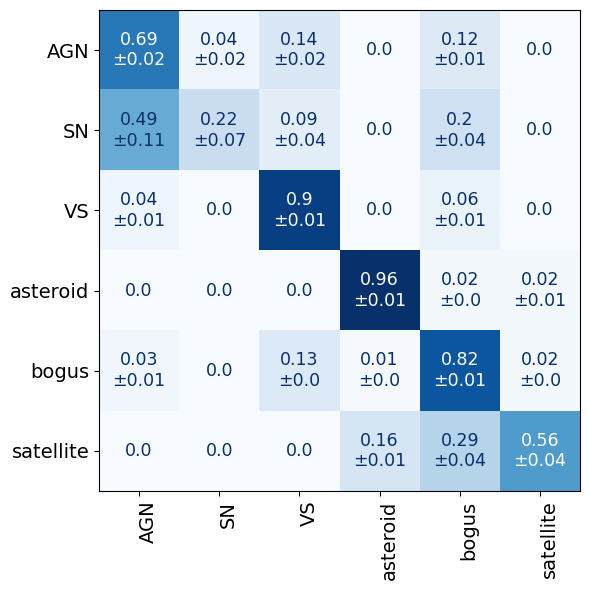

In [36]:
order_classes = ['AGN', 'SN', 'VS', 'asteroid', 'bogus', 'satellite']
get_confusion_matrix(mean_cm_norm, std_cm_norm, order_classes)